In [4]:
import pandas as pd

In [3]:
cd ~/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results

/mnt/c/Users/IgnacioIbarra/Dropbox/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results


In [8]:
df = pd.read_csv('../results_scbasset.csv',
                 index_col=0)

In [10]:
import seaborn as sns

In [18]:
grp

,dataset,feat_selection,loss_key,group,metric,value,model
1,noack_2022,random,poisson,train,pr_auc,0.226214,scBasset
4,noack_2022,random,poisson,val,pr_auc,0.182359,scBasset
7,noack_2022,random,poisson,test,pr_auc,0.153068,scBasset
1,noack_2022,random,bce,train,pr_auc,0.184764,scBasset
4,noack_2022,random,bce,val,pr_auc,0.173556,scBasset
7,noack_2022,random,bce,test,pr_auc,0.148686,scBasset
1,noack_2022,episcanpy,poisson,train,pr_auc,NaN,scBasset
4,noack_2022,episcanpy,poisson,val,pr_auc,NaN,scBasset
7,noack_2022,episcanpy,poisson,test,pr_auc,NaN,scBasset
1,noack_2022,episcanpy,bce,train,pr_auc,NaN,scBasset


('pr_auc', 'episcanpy') (6, 7)
('pr_auc', 'random') (15, 7)
('r2', 'episcanpy') (6, 7)
('r2', 'random') (15, 7)
('roc_auc', 'episcanpy') (6, 7)
('roc_auc', 'random') (15, 7)


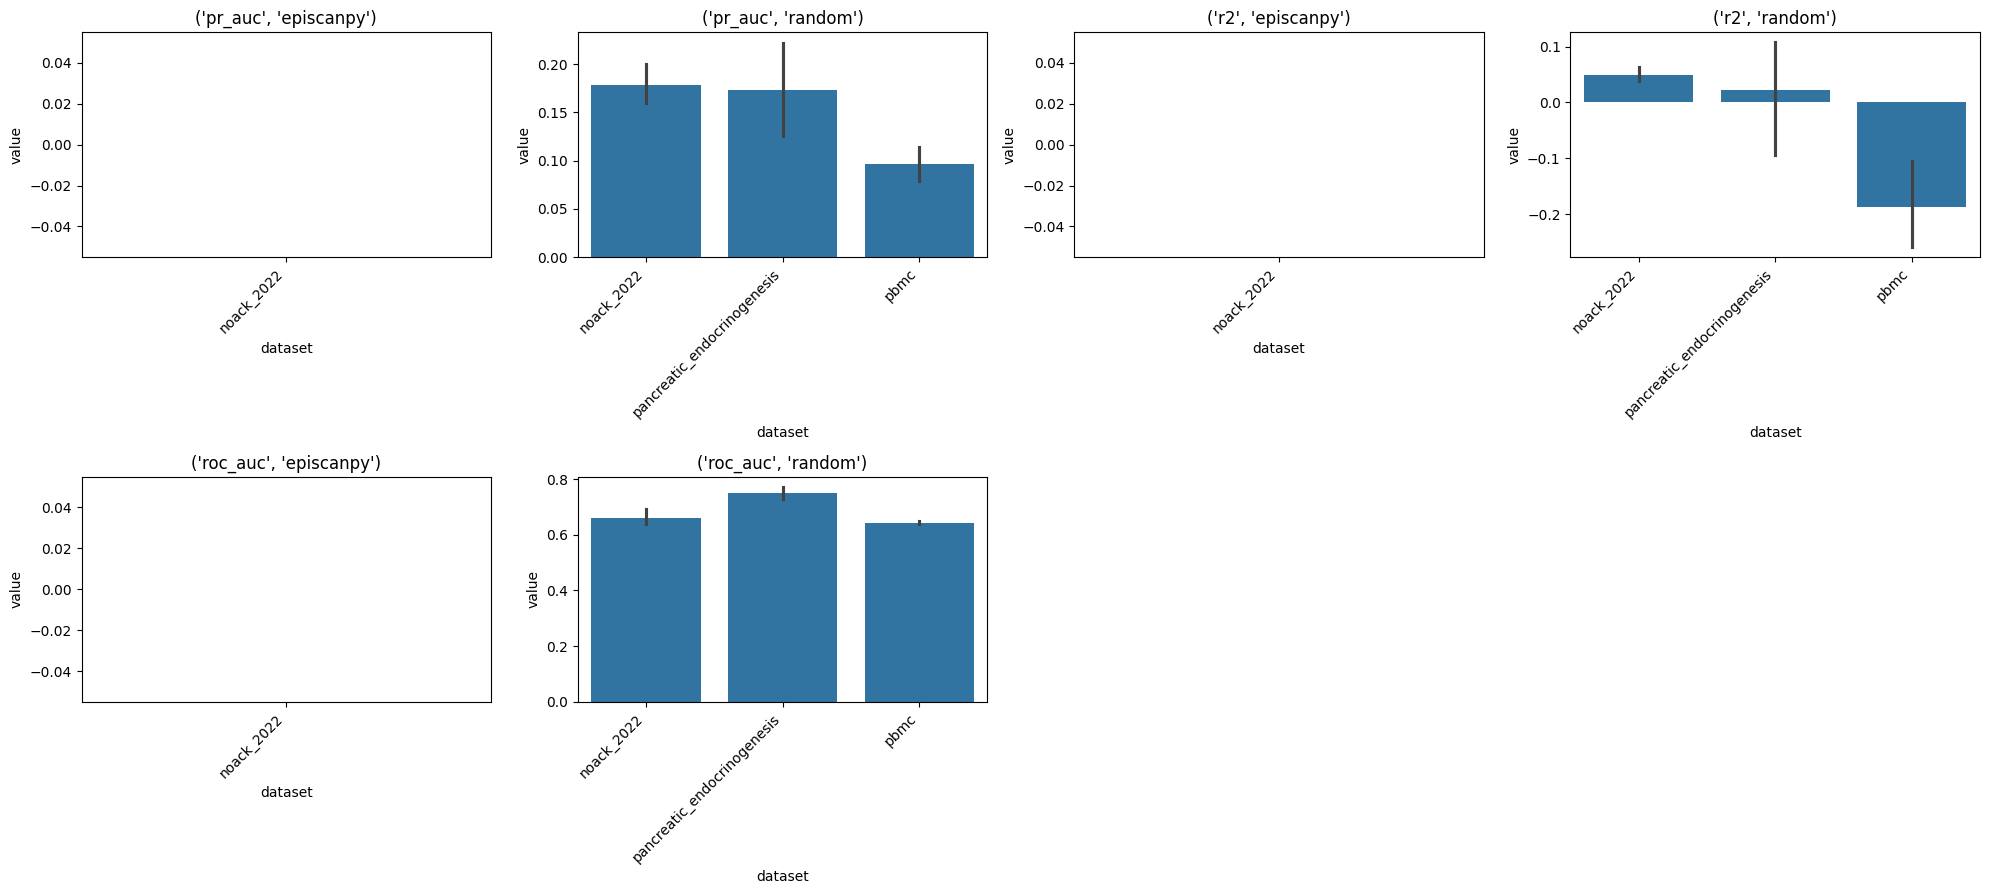

In [33]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 25
pi = 0
for k, grp in df.groupby(['metric', 'feat_selection']):
    ax = plt.subplot(6, 4, pi + 1)
    print(k, grp.shape)
    sns.barplot(data=grp,
                x='dataset',
                y='value',
                ax=ax)
    plt.xticks(rotation=45, ha='right')
    plt.title(k)
    pi += 1

plt.tight_layout()
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

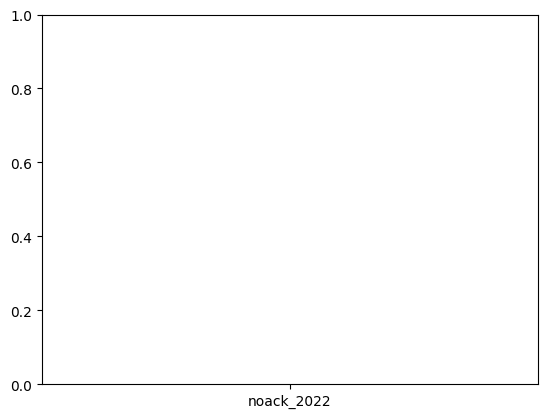